Goal:


Using the collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

# Load the Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeClassifier
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()


In [4]:
df = pd.read_csv(r'C:\Users\Elcot\Downloads\bank-full.csv')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Understand the data


for k in df:
print(df[k].unique())   

Categorical - job = ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown' 'retired' 'admin.' 'services' 
'self-employed' 'unemployed' 'housemaid''student']

Categorical - marital = ['married' 'single' 'divorced']

Categorical - education = ['tertiary' 'secondary' 'unknown' 'primary']

Categorical - default = ['no' 'yes']

balance = Numerical Value

Categorical -housing = ['yes' 'no']

Categorical - loan = ['no' 'yes']

Categorical - contact =['unknown' 'cellular' 'telephone']

day = NUmerical Value

Categorical - month = ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

duration =Numerical Value

campaign =Numerical Value

pdays =Numerical Value

previous =Numerical Value

Categorical - poutcome = ['unknown' 'failure' 'other' 'success']

Categorical - Target = ['no' 'yes']

# Univariate Analysis

In [11]:
print(df.shape)
df.describe().T

(45211, 17)


,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


From the above description we can see that most of the numerical datas are skewed.

Categorical variables are not present in the above view

Negative numbers are present in the data

We can see the outlier factors clearly

Even Zeores also present.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Info says there is no null 

Need to treat Categorical Variable

Finding out the unique values from the dataset will reveal some important information

In [17]:
## Unique Values

for k in df:
    print(df[k].unique())

[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['no' 'yes']
[ 2143    29     2 ...  8205 14204 16353]
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
[ 261  151   76 ... 1298 1246 1556]
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
[ -1 151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129

ABove unique comment reveals that many categorical variable consists of unknown values.

We need to treat that with mean , median or label encoder or hot encoding

In [19]:
print('Null Values: ', df['age'].isnull().any())
print(df['age'].min())
print(df['age'].max())


Null Values:  False
18
95


In [20]:
df.groupby('Target').count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


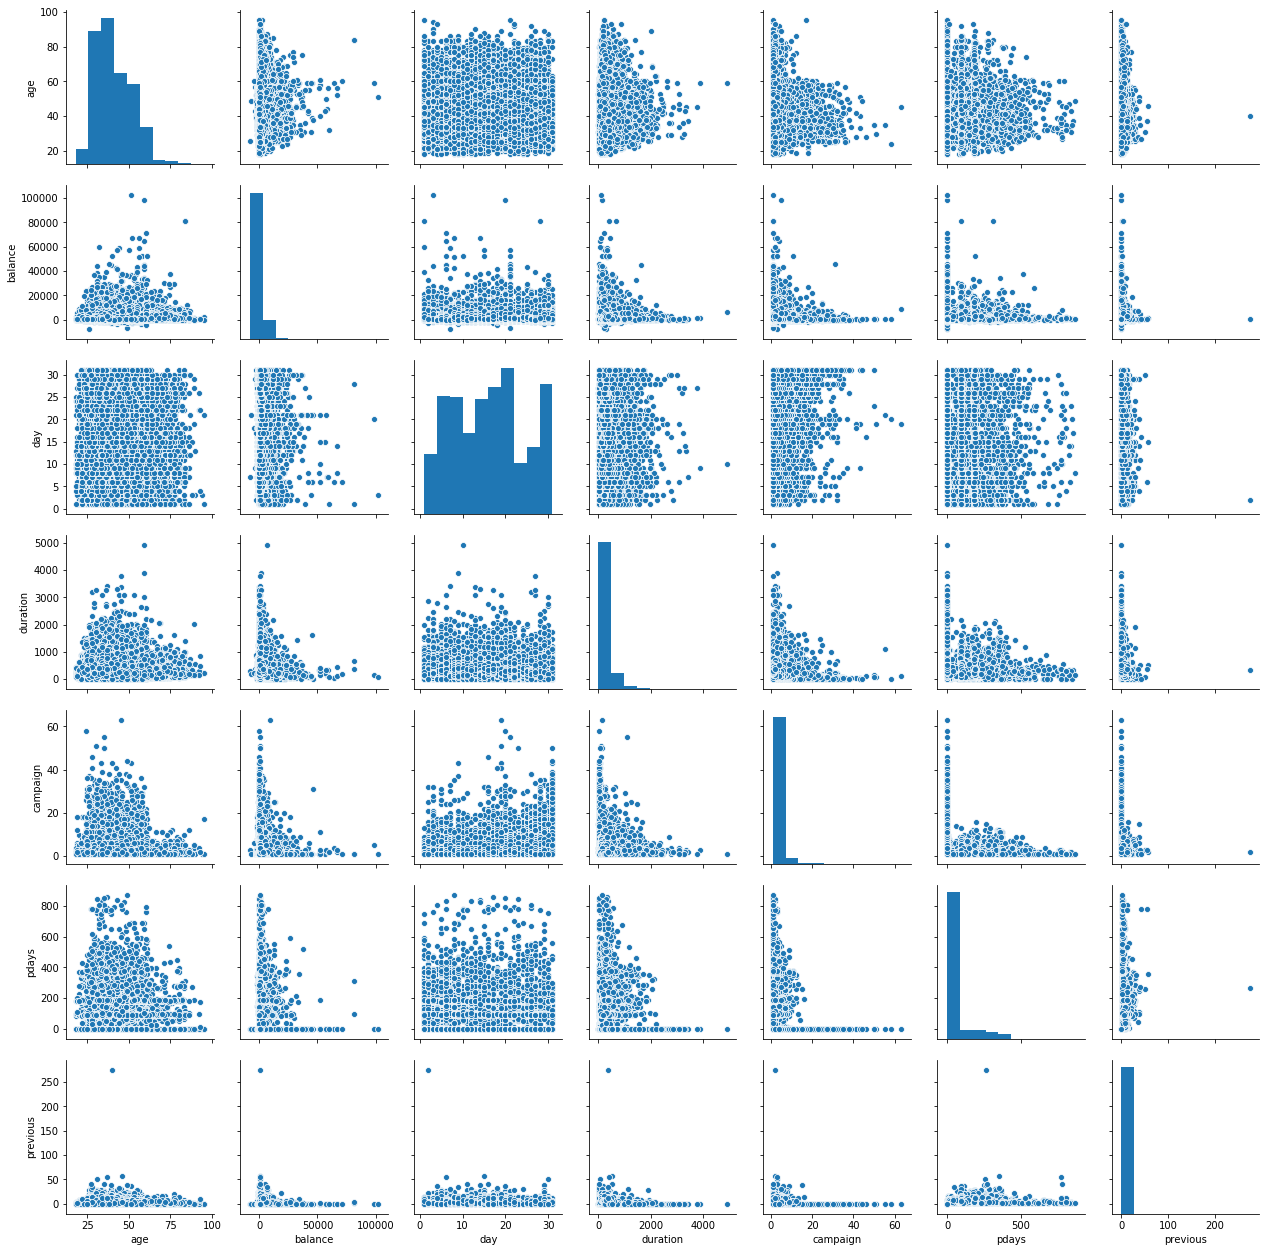

In [21]:
sns.pairplot(df)

Text(0.5, 0, 'age')

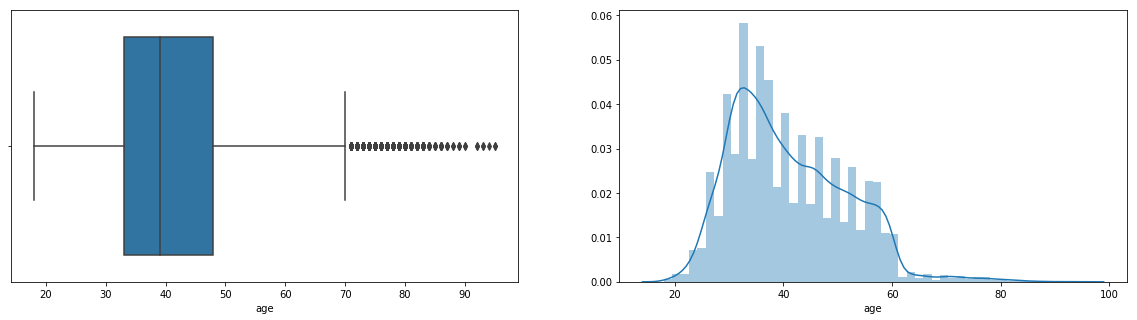

In [411]:
fig,(ax1, ax2) = plt.subplots(nrows = 1 , ncols = 2, figsize = (20,5) )
sns.boxplot( x = 'age' ,  data =df  , ax = ax1)
ax1.set_xlabel('age')

sns.distplot(df['age'], ax = ax2 )
ax2.set_xlabel('age')



In [412]:
# First Quartile
print('First Quartile', df['age'].quantile(0.25))
print('Second Quartile', df['age'].quantile(0.5))
print('Third Quartile', df['age'].quantile(0.75))
print('IQR' , df['age'].quantile(0.75) -df['age'].quantile(0.25) )
print('Lower' , (33 - 1.5 * 15 ))
print('Upper' , (48 + 1.5 * 15 ))
print('Number of Outliers ' , df[df['age'] > 70.5]['age'].count() )


First Quartile 33.0
Second Quartile 39.0
Third Quartile 48.0
IQR 15.0
Lower 10.5
Upper 70.5
Number of Outliers  487


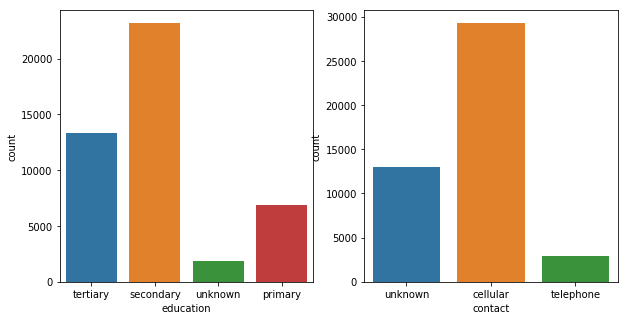

In [24]:
fig,(ax1, ax2  ) = plt.subplots(nrows = 1 , ncols = 2, figsize = (10,5) )
sns.countplot(x = 'education' ,data =df , ax = ax1)
sns.countplot(x = 'contact', data =df , ax = ax2)


Noticed many Unknowns are present in those attributes, if we delete those attributes there is a chance of endup with losing vital informations

In [25]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

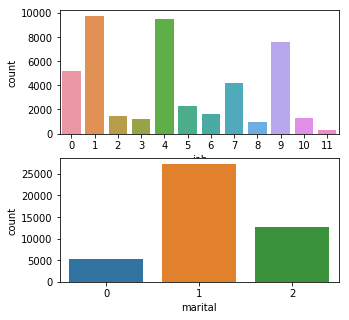

In [511]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 , ncols = 1 , figsize = (5,5))
sns.countplot(x = 'job' , data = df , ax = ax1)
sns.countplot(x = 'marital' , data = df , ax = ax2)


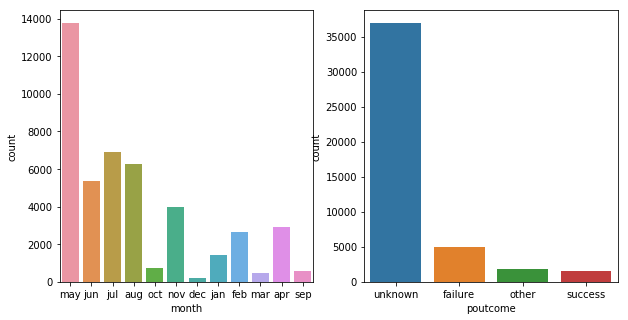

In [26]:
fig,(ax1, ax2 ) = plt.subplots(nrows = 1 , ncols = 2, figsize = (10,5) )
sns.countplot(x = 'month', data = df, ax = ax1)
sns.countplot(x = 'poutcome' , data = df , ax = ax2)

In [27]:
# First Quartile
print('First Quartile', df['age'].quantile(0.25))
print('Second Quartile', df['age'].quantile(0.5))
print('Third Quartile', df['age'].quantile(0.75))
print('IQR' , df['age'].quantile(0.75) -df['age'].quantile(0.25) )
print('Lower' , (33 - 1.5 * 15 ))
print('Upper' , (48 + 1.5 * 15 ))
print('Number of Outliers ' , df[df['age'] > 70.5]['age'].count() )

First Quartile 33.0
Second Quartile 39.0
Third Quartile 48.0
IQR 15.0
Lower 10.5
Upper 70.5
Number of Outliers  487


# Treating Categorical Variables

Actually it's a challenge to treat categorical variables

If we choose get_dummies it would make the separate columns according to the attributes uniquness and if the data is present it consider it as 1 and if it is not then 0.

We will endup with lot of attributes.

Treating each column with importance is tough.

Then there are other techniques label encoder Vs One hot encoding.

df = pd.get_dummies(data = df, columns = ['job'] , prefix = ['job'] )

df = pd.get_dummies(data = df, columns = ['marital'] , prefix = ['marital'] )

df = pd.get_dummies(data = df, columns = ['education'], prefix = ['education'])

df = pd.get_dummies(data = df, columns = ['default'] , prefix = ['default'])

df = pd.get_dummies(data = df, columns = ['housing'] , prefix = ['housing'])

df = pd.get_dummies(data = df, columns = ['loan'] , prefix = ['loan'] )

df = pd.get_dummies(data = df, prefix = ['contact'] , columns = ['contact'] )

df = pd.get_dummies(data = df, prefix = ['month'] , columns = ['month'] )

df = pd.get_dummies(data = df, prefix = ['poutcome'], columns = ['poutcome'])



Chosen technique is labelcoder inorder to transform the data into numerical

In [29]:

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df['job']     = labelencoder_X.fit_transform(df['job'])
df['marital']     = labelencoder_X.fit_transform(df['marital'])
df['education']     = labelencoder_X.fit_transform(df['education'])
df['default']     = labelencoder_X.fit_transform(df['default'])
df['housing']     = labelencoder_X.fit_transform(df['housing'])
df['loan']     = labelencoder_X.fit_transform(df['loan'])
df['month']     = labelencoder_X.fit_transform(df['month'])
df['poutcome']     = labelencoder_X.fit_transform(df['poutcome'])
df['contact']     = labelencoder_X.fit_transform(df['contact'])
df['Target']     = labelencoder_X.fit_transform(df['Target'])


df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [30]:
X= df.iloc[:, :16]
y = df['Target']


# Model Building

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [33]:
df['duration'].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556], dtype=int64)

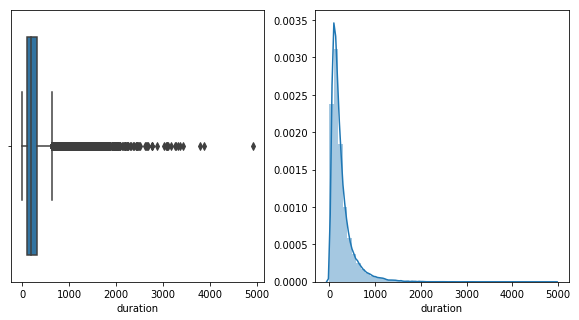

In [560]:
fig , (ax1,ax2 ) = plt.subplots(nrows = 1, ncols = 2 , figsize=(10,5))
sns.boxplot(df['duration'], ax = ax1)
sns.distplot(df['duration'], ax = ax2 )


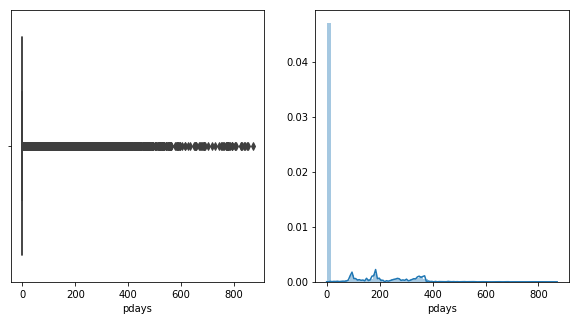

In [561]:
fig , (ax1,ax2 ) = plt.subplots(nrows = 1, ncols = 2 , figsize=(10,5))
sns.boxplot(sca['pdays'], ax = ax1)
sns.distplot(df['pdays'], ax = ax2 )

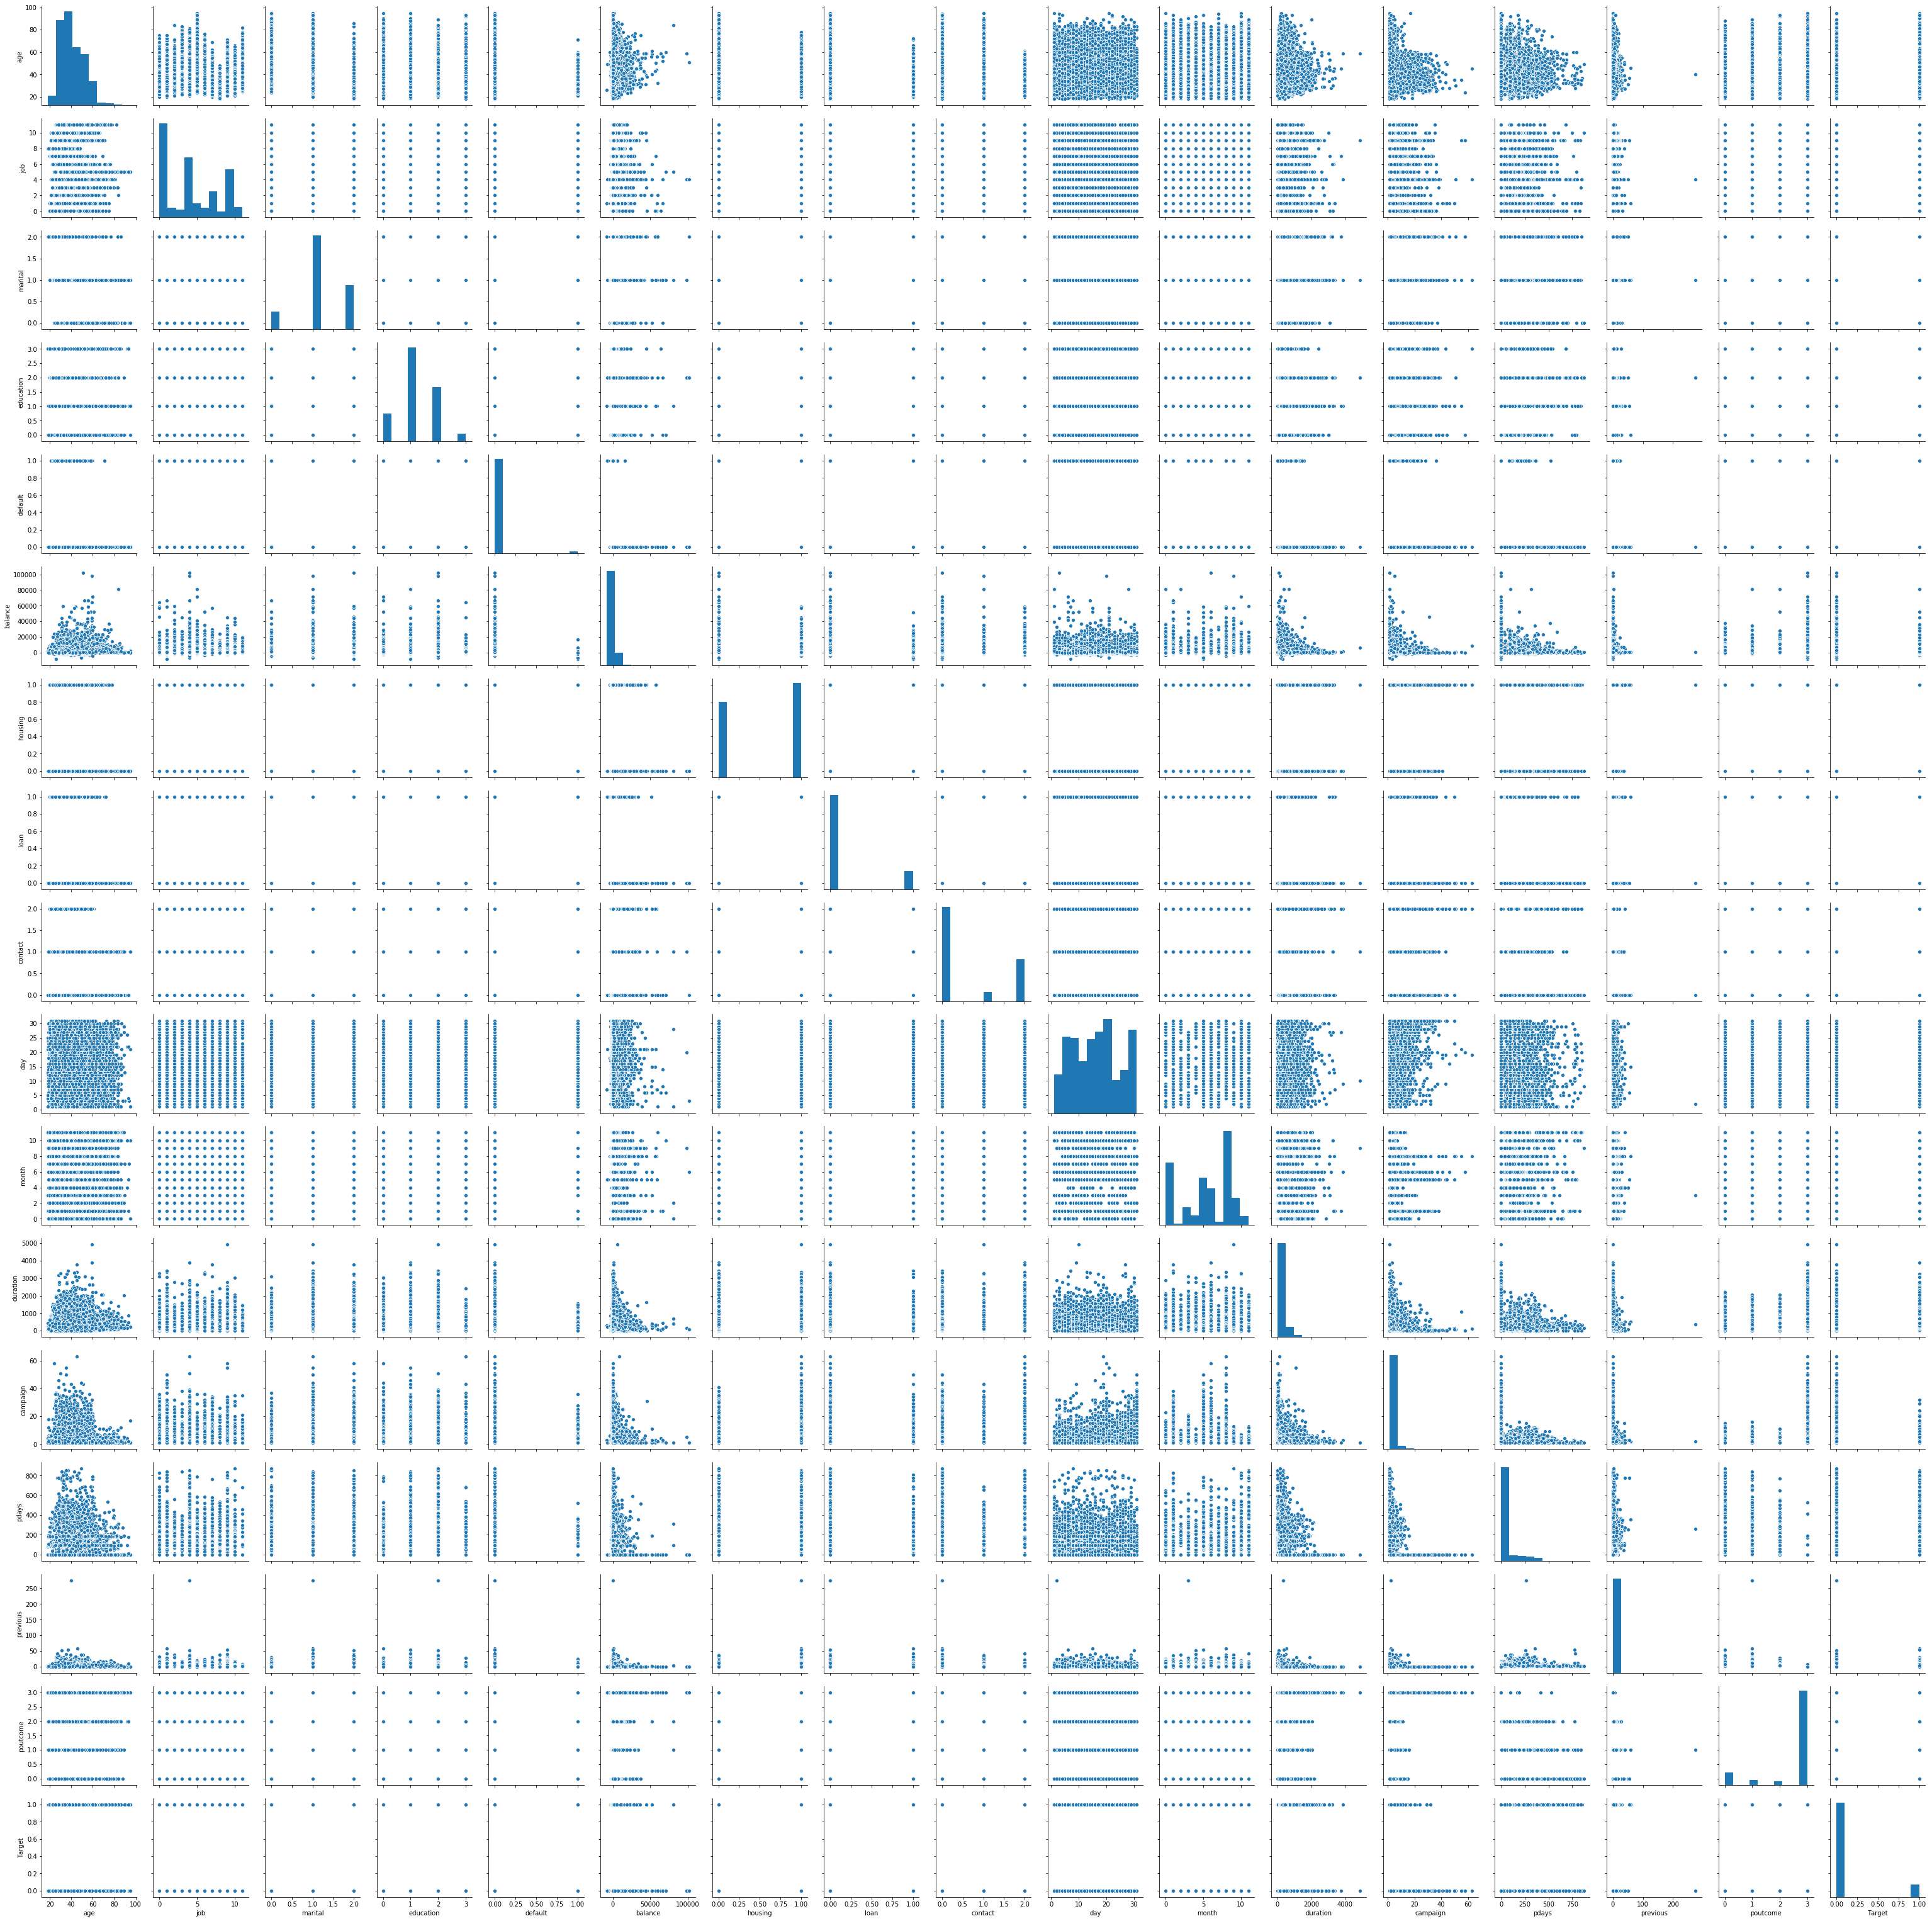

In [34]:
sns.pairplot(df)

Due to the data skewness and outliers we are not supposed to take as it is.

Either we need to do log transformation or standarad sclaer (Often this is referred to as normalization and attributes are often rescaled into the range between 0 and 1.)

In [35]:
scaled_features = df.copy()
col_names = ['age', 'job', 'marital', 'education', 'balance','contact', 'day', 'month', 'duration', 'campaign', 'pdays','previous', 'poutcome']

from sklearn.preprocessing import StandardScaler
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)



In [36]:
scaled_features[col_names] = features


In [37]:
scaled_features.columns
X = scaled_features[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome' ]]
y = scaled_features['Target']

In [38]:
print(X.shape)
print(y.shape)

(45211, 16)
(45211,)


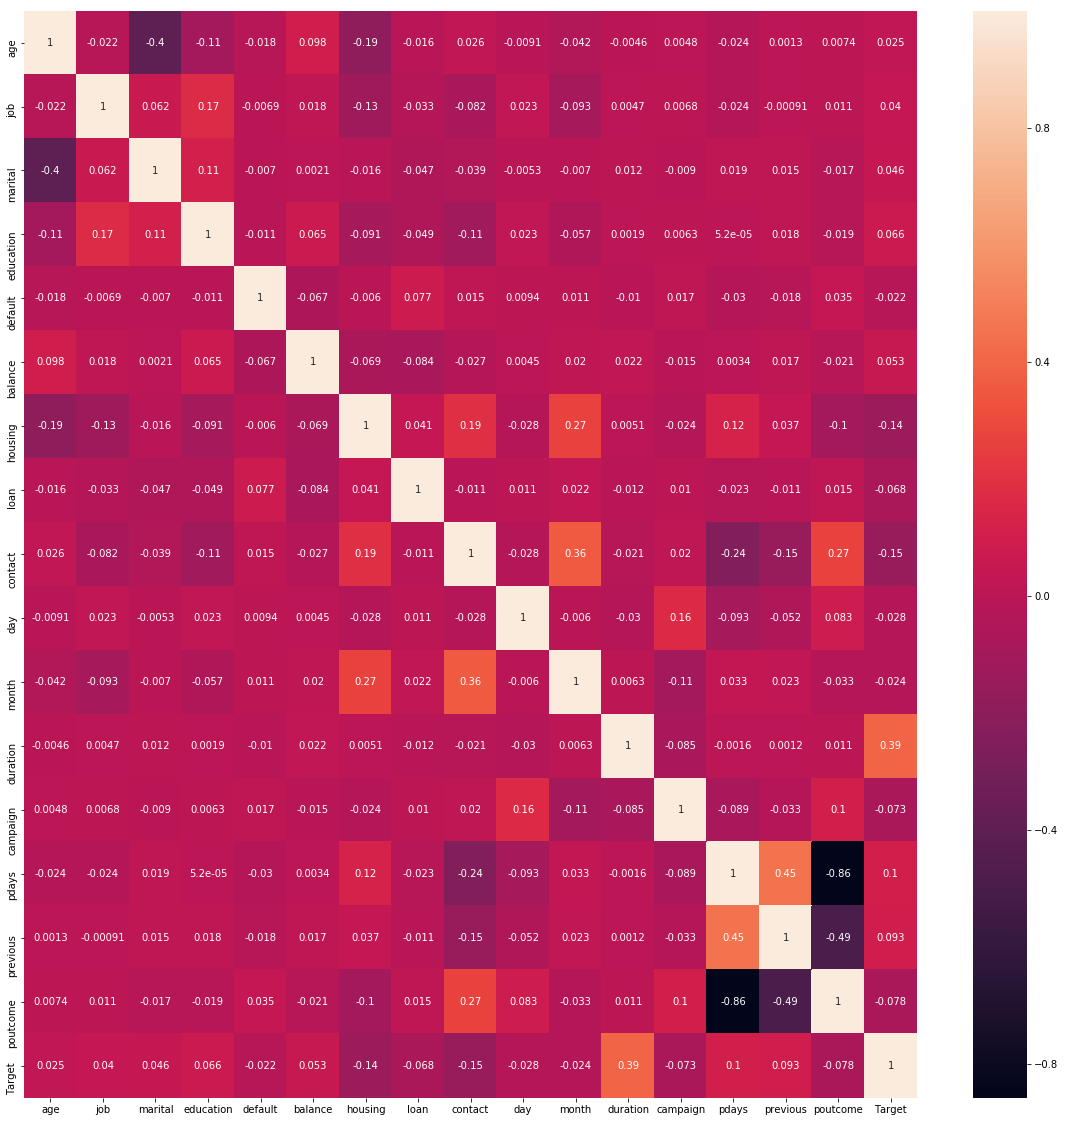

In [46]:
fig, ax = plt.subplots(figsize=(20,20))
d = scaled_features.corr()
sns.heatmap(d, annot = True ,  ax = ax)

From the corr graph the correlation between each attributes is very minimal.

In [50]:
df.corr().min()

age         -0.403240
job         -0.125363
marital     -0.403240
education   -0.110928
default     -0.066745
balance     -0.084350
housing     -0.185513
loan        -0.084350
contact     -0.244816
day         -0.093044
month       -0.110031
duration    -0.084570
campaign    -0.110031
pdays       -0.858362
previous    -0.489752
poutcome    -0.858362
Target      -0.148395
dtype: float64

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 101)

# Cross Validation

In [55]:
from sklearn.model_selection import  KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_Fold = KFold(n_splits=10, shuffle=True, random_state=10)

# Logistic Regression

In [56]:
clr = LogisticRegression()
clr.fit(X_train,y_train)
pred = clr.predict(X_test)
print(confusion_matrix(y_test , pred))
print(accuracy_score(y_test , pred))
cv = (cross_val_score(clr, X_train, y_train, cv=k_Fold, n_jobs=1, scoring = 'accuracy').mean())
print(cv)

[[7805  139]
 [ 847  252]]
0.8909653875926131
0.8911743738393673


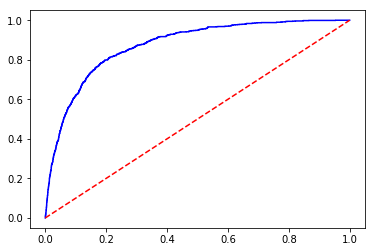

In [57]:
fig,(ax) = plt.subplots(nrows = 1, ncols = 1)
prob = clr.predict_proba(X_test)
preds = prob[: , 1]
fprclr,tprclr,thresholdclr = metrics.roc_curve(y_test,preds)
auc_curve = metrics.auc(fprclr,tprclr)
ax.plot(fprclr, tprclr, 'b', label =  auc_curve)
ax.plot([0, 1], [0, 1],'r--')

# KNearest Neighbor

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7836  108]
 [ 845  254]]
89.0


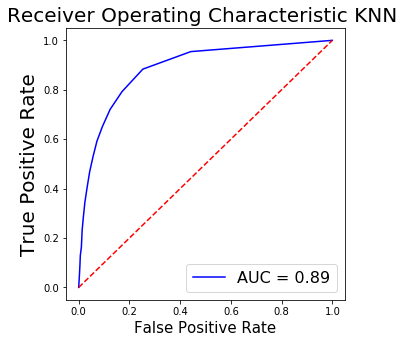

In [63]:
from sklearn import metrics
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))
probs = knn.predict_proba(X_test)
pred = probs[:,1]
fprknn,tprknn,thresholdknn =  metrics.roc_curve(y_test,pred)

roc_aucknn = metrics.auc(fprknn, tprknn)
ax.plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic KNN ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})



# Support Vector Machine

In [64]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)

[[7227  717]
 [ 819  280]]
83.0


In [ ]:
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

# Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
dec = DecisionTreeClassifier(criterion = 'gini')
dec.fit(X_train,y_train)
decpred = dec.predict(X_test)
print(confusion_matrix(y_test,decpred))
print(accuracy_score(y_test, decpred))

[[7379  565]
 [ 587  512]]
0.8726086475727082


In [66]:
deccv = (cross_val_score(dec, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

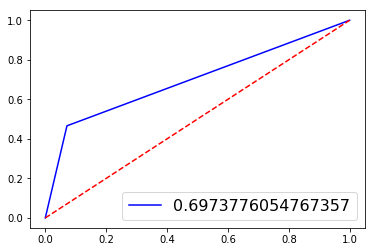

In [68]:
fig,(ax) = plt.subplots(nrows = 1, ncols = 1)
prob = dec.predict_proba(X_test)
preds = prob[: , 1]
fprdec,tprdec,thresholddec = metrics.roc_curve(y_test,preds)
auc_curve = metrics.auc(fprdec,tprdec)
ax.plot(fprdec, tprdec, 'b', label =  auc_curve)
ax.plot([0, 1], [0, 1],'r--')
ax.legend(loc = 'lower right', prop={'size': 16})


# Random Forest 

In [69]:
from sklearn.ensemble import RandomForestClassifier
rdm = RandomForestClassifier(n_estimators=200)
rdm.fit(X_train,y_train)
rdmpred = rdm.predict(X_test)
print(confusion_matrix(y_test, rdmpred))
print(accuracy_score(y_test, rdmpred))

[[7734  210]
 [ 629  470]]
0.9072210549596373


In [70]:
rfccv = (cross_val_score(rdm , X_train, y_train, cv=k_fold, scoring = 'accuracy').mean())

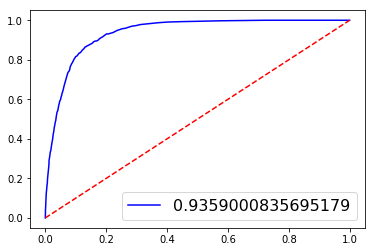

In [71]:
fig,(ax) = plt.subplots(nrows = 1, ncols = 1)
prob = rdm.predict_proba(X_test)
preds = prob[: , 1]
fprrdm,tprrdm,thresholdrdm = metrics.roc_curve(y_test,preds)
auc_curve = metrics.auc(fprrdm,tprrdm)
ax.plot(fprrdm, tprrdm, 'b', label =  auc_curve)
ax.plot([0, 1], [0, 1],'r--')
ax.legend(loc = 'lower right', prop={'size': 16})


# Gaussian Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7019  925]
 [ 559  540]]
84.0


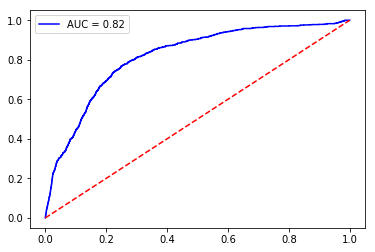

In [77]:
fig,(ax) = plt.subplots(nrows = 1, ncols = 1)
prob = gaussiannb.predict_proba(X_test)
preds = prob[:,1]
fprgaussiannb,tprgaussiannb,thresholdgaussiannb = metrics.roc_curve(y_test,preds )
auc_curve = metrics.auc(fprgaussiannb,tprgaussiannb)
ax.plot(fprgaussiannb, tprgaussiannb, 'b', label = 'AUC = %0.2f' % auc_curve)
ax.plot([0, 1], [0, 1],'r--')
ax.legend()

# XGBoost Classifier

In [78]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

[[7776  168]
 [ 684  415]]
91.0


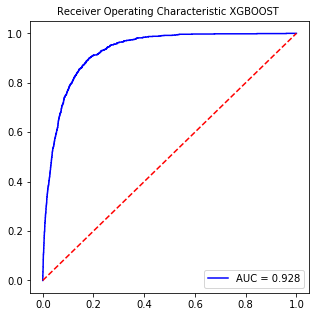

In [79]:
from sklearn import metrics
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.3f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic XGBOOST ',fontsize=10)
ax.legend()


# Gradient Boosting Classifier

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7760  184]
 [ 665  434]]
91.0


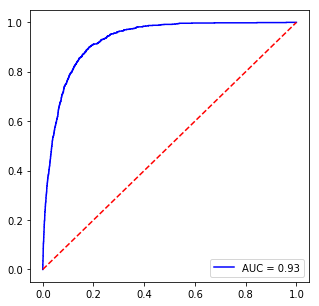

In [90]:
from sklearn import metrics
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))
probs = gbk.predict_proba(X_test)
fprgbk,tprgbk,thresholdgbk =  metrics.roc_curve(y_test,gbkpred)

roc_aucxgb = metrics.auc(fprxgb, tprxgb)
ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.legend()



In [88]:
## KNN
print('K Nearest Neighbor : ')
print(metrics.classification_report(y_test, knnpred))

print('Support Vector Machine')
print(metrics.classification_report(y_test, svcpred))

print('Decision tree Classifier')
print(metrics.classification_report(y_test, decpred))

print('Random Forest')
print(metrics.classification_report(y_test, rdmpred))

print('Gaussian Naive Bayes')
print(metrics.classification_report(y_test, gaussiannbpred))

print('Xg Boost')
print(metrics.classification_report(y_test, xgbprd))

print('Gradient Boosting')
print(metrics.classification_report(y_test, gbkpred))

K Nearest Neighbor : 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7944
           1       0.70      0.23      0.35      1099

   micro avg       0.89      0.89      0.89      9043
   macro avg       0.80      0.61      0.65      9043
weighted avg       0.88      0.89      0.87      9043

Support Vector Machine
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      7944
           1       0.28      0.25      0.27      1099

   micro avg       0.83      0.83      0.83      9043
   macro avg       0.59      0.58      0.59      9043
weighted avg       0.82      0.83      0.83      9043

Decision tree Classifier
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7944
           1       0.48      0.47      0.47      1099

   micro avg       0.87      0.87      0.87      9043
   macro avg       0.70      0.70      0.70      9043
weig

From the accuracy point of view ensemble Technique Xgboost and gradient boosting algorithm gives better results

The amount of false positive in xgboost and gradient is comparitively less than other models.
